In [1]:
import geopandas as gpd

<Axes: >

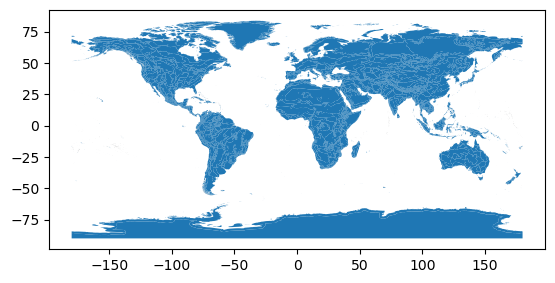

In [2]:
ecos = gpd.read_file("Data/Geo/official/wwf_terr_ecos.shp")
ecos.plot()

<Axes: >

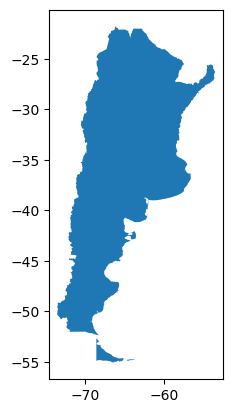

In [3]:
arg = gpd.read_file("Data/Geo/argentina_geometry.geojson")
arg.plot()

In [4]:
join = gpd.overlay(
    ecos,
    arg,
    how='intersection'
)
join.head()

/Users/santi/miniforge3/envs/Tesina/lib/python3.8/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/3b/q__cv4rj3gl3n9j3lyvf0fdh0000gn/T/ipykernel_24818/1557421857.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  join = gpd.overlay(


,OBJECTID,AREA,PERIMETER,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,...,G200_BIOME,G200_STAT,Shape_Leng,Shape_Area,area_km2,eco_code,PER_area,PER_area_1,PER_area_2,geometry
0,3588,6.732333,0.131,Magellanic subpolar forests,NT,4.0,2.0,60402.0,76.0,3.0,...,0.0,0.0,0.130632,0.000937,164642,NT0402,0.0,0.0,0.0,"POLYGON ((-64.13652 -54.64637, -64.13781 -54.6..."
1,3594,498.836263,3.162,Magellanic subpolar forests,NT,4.0,2.0,60402.0,76.0,3.0,...,0.0,0.0,3.162168,0.069653,164642,NT0402,0.0,0.0,0.0,"MULTIPOLYGON (((-64.67084 -54.90669, -64.68050..."
2,3071,3985.700030,3.863,Patagonian steppe,NT,8.0,5.0,60805.0,87.0,1.0,...,8.0,0.0,3.862823,0.436491,576599,NT0805,0.0,0.0,0.0,"MULTIPOLYGON (((-64.56772 -42.42961, -64.56755..."
3,2910,786789.522344,82.965,Dry Chaco,NT,7.0,10.0,60210.0,91.0,2.0,...,0.0,0.0,82.962401,70.624629,786790,NT0210,0.0,0.0,0.0,"POLYGON ((-59.84551 -24.11337, -59.88239 -24.4..."
4,2916,359398.164800,110.470,Alto Paraná Atlantic forests,NT,1.0,50.0,60150.0,67.0,1.0,...,1.0,0.0,110.467175,31.824257,482879,NT0150,0.0,0.0,0.0,"MULTIPOLYGON (((-53.82391 -25.81017, -53.84486..."
5,2898,252828.851527,42.744,Central Andean dry puna,NT,10.0,1.0,61001.0,25.0,3.0,...,10.0,0.0,42.742324,22.019190,254929,NT1001,0.0,0.0,0.0,"POLYGON ((-66.60866 -22.19541, -66.62481 -22.3..."
6,2903,140677.791904,91.017,Central Andean puna,NT,10.0,2.0,61002.0,59.0,2.0,...,0.0,0.0,91.013742,12.405344,211478,NT1002,0.0,0.0,0.0,"MULTIPOLYGON (((-64.89463 -22.12143, -64.89979..."
7,2946,32771.514912,15.441,Southern Andean Yungas,NT,1.0,65.0,60165.0,64.0,2.0,...,1.0,0.0,15.440475,2.884997,75150,NT0165,0.0,0.0,0.0,"POLYGON ((-63.62187 -21.99863, -63.62187 -22.0..."
8,2953,289240.691945,54.429,Humid Chaco,NT,7.0,8.0,60708.0,60.0,2.0,...,0.0,0.0,54.427459,26.155866,291590,NT0708,0.0,0.0,0.0,"MULTIPOLYGON (((-55.81327 -27.43045, -55.83501..."
9,2967,2100.217818,2.038,Central Andean dry puna,NT,10.0,1.0,61001.0,25.0,3.0,...,10.0,0.0,2.037642,0.184394,254929,NT1001,0.0,0.0,0.0,"POLYGON ((-65.13977 -22.31108, -65.16817 -22.3..."


In [14]:
import folium

# Define colors for each ecosystem
colors = {
    'Magellanic subpolar forests': '#1B4F72',
    'Patagonian steppe': '#D4AC0D',
    'Dry Chaco': '#BA4A00',
    'Alto Paraná Atlantic forests': '#196F3D',
    'Central Andean dry puna': '#B7950B',
    'Central Andean puna': '#9A7D0A',
    'Southern Andean Yungas': '#27AE60',
    'Humid Chaco': '#229954',
    'High Monte': '#A04000',
    'Araucaria moist forests': '#145A32',
    'Southern Andean steppe': '#D68910',
    'Paraná flooded savanna': '#2E86C1',
    'Southern Cone Mesopotamian savanna': '#58D68D',
    'Uruguayan savanna': '#82E0AA',
    'Espinal': '#28B463',
    'Low Monte': '#873600',
    'Humid Pampas': '#7DCEA0',
    'Valdivian temperate forests': '#0B5345',
    'Rock and Ice': '#808B96'
}

# Create map centered on Argentina
m = folium.Map(location=[-38.416097, -63.616672], zoom_start=4)

# Style function for the GeoJson
def style_function(feature):
    eco_name = feature['properties']['ECO_NAME']
    return {
        'fillColor': colors[eco_name],
        'fillOpacity': 0.7,
        'color': 'black',
        'weight': 1
    }

# Popup function to show ecosystem name when clicked
def popup_function(feature):
    eco_name = feature['properties']['ECO_NAME']
    return f"Ecosystem: {eco_name}"

# Add GeoJson layer
folium.GeoJson(
    join,
    style_function=style_function,
    popup=folium.GeoJsonPopup(fields=['ECO_NAME']),
    tooltip=folium.GeoJsonTooltip(fields=['ECO_NAME'], aliases=['Ecosystem:']),
    highlight_function=lambda x: {'fillOpacity': 0.9, 'weight': 2}
).add_to(m)

# Add legend
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; right: 50px; width: 200px; height: 400px; 
            border:2px solid grey; z-index:9999; 
            background-color:white;
            opacity:0.8;
            overflow:auto;">
<div style="padding:10px;">
<h4 style="margin-top:0;">Ecosystems</h4>
'''

for eco, color in colors.items():
    legend_html += f'''
    <div style="display:flex;align-items:center;margin-bottom:5px;">
        <div style="background:{color};width:20px;height:20px;margin-right:5px;"></div>
        <div style="font-size:12px;">{eco}</div>
    </div>'''

legend_html += '</div></div>'

m.get_root().html.add_child(folium.Element(legend_html))

# Display map
m

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import box, Polygon
import h3
# h3 is a hierarchical hexagonal geospatial indexing system that might be useful here

class HierarchicalGrid:
    def __init__(self, base_gdf, levels=[8, 9, 10]):
        """
        Initialize with a GeoDataFrame of ecoregions and desired H3 resolution levels
        
        Parameters:
        base_gdf: GeoDataFrame with ecoregions
        levels: List of H3 resolution levels (higher number = smaller hexagons)
        """
        self.base_gdf = base_gdf
        self.levels = levels
        self.grid_index = {}  # Will store grids for each level
        self.hexagon_ecoregion_map = {}  # Will store ecoregion composition for each hexagon

    def create_hierarchical_index(self):
        """Create hierarchical spatial index for all levels"""
        for level in self.levels:
            # Create empty GeoDataFrame for this level
            grid_cells = []

            # Process each ecoregion
            for idx, row in self.base_gdf.iterrows():
                # Get all H3 hexagons that intersect with the ecoregion
                hexagons = self._get_hexagons_for_polygon(row.geometry, level)
                eco_name = row['ECO_NAME']

                # Store each hexagon with its ecoregion information
                for h in hexagons:
                    hex_geom = self._h3_to_polygon(h)
                    grid_cells.append({
                        'h3_index': h,
                        'geometry': hex_geom,
                        'level': level,
                        'ecoregion': eco_name,
                        'parent': h3.cell_to_parent(h, level-1) if level > self.levels[0] else None
                    })

            # Convert to GeoDataFrame
            self.grid_index[level] = gpd.GeoDataFrame(grid_cells)

            # Calculate ecoregion composition for each hexagon
            self._calculate_ecoregion_composition(level)

    def _get_hexagons_for_polygon(self, polygon, resolution):
        """Get all H3 hexagons that intersect with a polygon"""
        return list(h3.polygon_to_cells(
            polygon.__geo_interface__['coordinates'][0], resolution))

    def _h3_to_polygon(self, h3_index):
        """Convert H3 index to Shapely polygon"""
        coords = h3.cell_to_boundary(h3_index, geo_json=True)
        return Polygon(coords)

    def _calculate_ecoregion_composition(self, level):
        """Calculate the composition of ecoregions in each hexagon"""
        grid_gdf = self.grid_index[level]

        # Group by h3_index to get all ecoregions in each hexagon
        compositions = grid_gdf.groupby('h3_index')['ecoregion'].agg(list)

        # Calculate percentages
        for h3_idx, ecoregions in compositions.items():
            total = len(ecoregions)
            composition = {eco: ecoregions.count(eco)/total
                           for eco in set(ecoregions)}
            self.hexagon_ecoregion_map[h3_idx] = composition

    def get_children(self, h3_index):
        """Get all child hexagons for a given H3 index"""
        return list(h3.cell_to_children(h3_index))

    def get_parent(self, h3_index):
        """Get parent hexagon for a given H3 index"""
        return h3.cell_to_parent(h3_index)

    def sample_by_ecoregion(self, level, samples_per_ecoregion, min_eco_percentage=0.7):
        """
        Perform stratified sampling by ecoregion
        
        Parameters:
        level: H3 resolution level to sample from
        samples_per_ecoregion: dict of {ecoregion: number_of_samples}
        min_eco_percentage: minimum percentage of hexagon that must be covered
                          by an ecoregion to be considered for sampling
        """
        sampled_hexagons = []

        for eco, n_samples in samples_per_ecoregion.items():
            # Get hexagons where this ecoregion is dominant
            eligible_hexagons = [
                h3_idx for h3_idx, comp in self.hexagon_ecoregion_map.items()
                if comp.get(eco, 0) >= min_eco_percentage
            ]

            if len(eligible_hexagons) >= n_samples:
                sampled = np.random.choice(eligible_hexagons, n_samples, replace=False)
                sampled_hexagons.extend(sampled)
            else:
                print(f"Warning: Not enough eligible hexagons for {eco}")
                sampled_hexagons.extend(eligible_hexagons)

        return sampled_hexagons

# Example usage:# Create the hierarchical grid system
hierarchical_grid = HierarchicalGrid(join)  # join is your ecoregions GeoDataFrame
hierarchical_grid.create_hierarchical_index()

# Sample some hexagons
samples_needed = {
    'Humid Pampas': 10,
    'Dry Chaco': 10,
    # ... add other ecoregions as needed
}

sampled_hexagons = hierarchical_grid.sample_by_ecoregion(9, samples_needed)

# Visualize results
level = 9
sampled_grid = hierarchical_grid.grid_index[level][
    hierarchical_grid.grid_index[level]['h3_index'].isin(sampled_hexagons)]

# Plot
import folium

m = folium.Map(location=[-38.416097, -63.616672], zoom_start=4)

# Add all grid cells with transparency
folium.GeoJson(
    hierarchical_grid.grid_index[level],
    style_function=lambda x: {
        'fillColor': 'gray',
        'fillOpacity': 0.1,
        'weight': 1,
        'color': 'black'
    }
).add_to(m)

# Add sampled cells with highlight
folium.GeoJson(
    sampled_grid,
    style_function=lambda x: {
        'fillColor': 'red',
        'fillOpacity': 0.5,
        'weight': 2,
        'color': 'red'
    }
).add_to(m)

m